## K-Means Clustering
#### Lew Sears

In [1]:
import numpy as np
import pandas as pd

In [30]:
class K_Means_Clustering:
    '''Basic k-means algorithm for cluster analysis. '''
    
    #initialize the hyperparameter k
    def __init__(self, k):
        try:
            if type(k) == int and k >= 1:
                self.k = k
            else:
                raise ValueError('Bad k')
        except ValueError as exp:
            line = "\n-------------------------------------------------\n"
            print("Value Error:{}Given k = {}. Bad choice my friend!{}k must be a nonzero positive integer.{}\
            ".format(line, k, line, line))
    
    #Find the best centroids to create labels
    def fit(self, df, iterations):
        '''Input a scaled np.array with only numerical columns to be assigned labels. For a pandas dataframe,
        just fit StandardScaler and transform the dataframe. Put in the amount of iterations you desire. The
        iterations will stop if the labels do not change.'''
        
        #We will run through this process based on the set ammount of iterations.
        iteration_counter = 0
        while iteration_counter < iterations:
            
            #Initialize centroids
            if iteration_counter == 0:
                #df is scaled so we just want random points normally distibuted around 0
                centroids = np.random.normal(0 , 1, size = (self.k,df.shape[1]))
            #Update centroids
            else:
                centroids = centroids_update


            #Pick the labels
            closest_centroid = []
            for vec in df:
                distances = np.sum((centroids - vec)**2, axis = 1)
                label = np.argmin(distances)
                closest_centroid.append(label)
                
            #Check if any labels have changed
            try:
                if len(np.unique(labels == np.array(closest_centroid))) == 1:
                    self.k_labels = labels
                    line = "\n----------------------------------------------\n"
                    df_count_labels = pd.DataFrame({'Label Counts': 
                                                    np.unique(model.k_labels, return_counts = True)[1]})
                    return print("Convergence Reached. Stopped at iteration {}.{}{}\
                                ".format(iteration_counter, line, df_count_labels))
            except:
                pass
            
            
            labels = np.array(closest_centroid)

            #Now calculate new centroids
            updates = []
            unique_labels = np.unique(labels)
            for some_label in unique_labels:
                some_label_group = df[labels == some_label]
                
                #Find the average
                try: 
                    center = np.sum(some_label_group, axis = 0)/some_label_group.shape[0]
                    
                #This is basically the case where there are no points with this label
                except:
                    center = np.random.normal(0 , 1, size = (5,)) 
                
                updates.append(center)
            centroids_update = np.array(updates)
            iteration_counter += 1

        self.k_labels = labels
        line = "\n-----------------------\n"
        df_count_labels = pd.DataFrame({'Label Counts': np.unique(model.k_labels, return_counts = True)[1]})
        return print("Reached max iterations.{}{}".format(line,df_count_labels))

#### Let's try an example

In [38]:
sample_df = np.random.normal(0 , 1, size = (1000,2))
sample_df[:5]

array([[-1.52857872,  2.17653548],
       [ 1.19485315,  0.58944749],
       [ 0.91814739,  1.15583661],
       [-0.55341375,  0.28022994],
       [-1.43747561,  2.56424498]])

In [39]:
model = K_Means_Clustering(3)

In [40]:
model.fit(sample_df, 50)

Convergence Reached. Stopped at iteration 11.
----------------------------------------------
   Label Counts
0           298
1           351
2           351                                


In [52]:
model.k_labels[:50]

array([1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       1, 2, 1, 2, 0, 0])

Let's try see how it did.

In [55]:
df_plotter = pd.DataFrame(dict(x=sample_df[:,0], y=sample_df[:,1], label=model.k_labels))
groups = df_plotter.groupby('label')
df_plotter.head()

,x,y,label
0,-1.528579,2.176535,1
1,1.194853,0.589447,1
2,0.918147,1.155837,1
3,-0.553414,0.280230,0
4,-1.437476,2.564245,1


In [41]:
import matplotlib.pyplot as plt

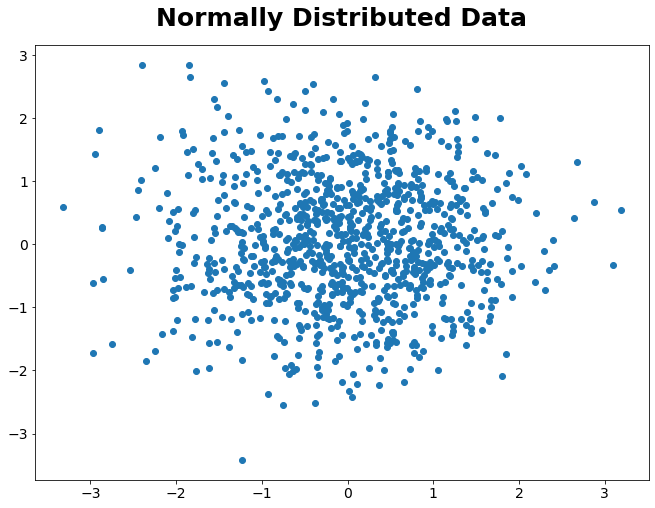

In [56]:
#This should be just completely normally distributed
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)
plt.scatter(df_plotter['x'],df_plotter['y'])
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
ax.set_title("Normally Distributed Data",fontsize=25,fontweight = 'bold', y=1.03);

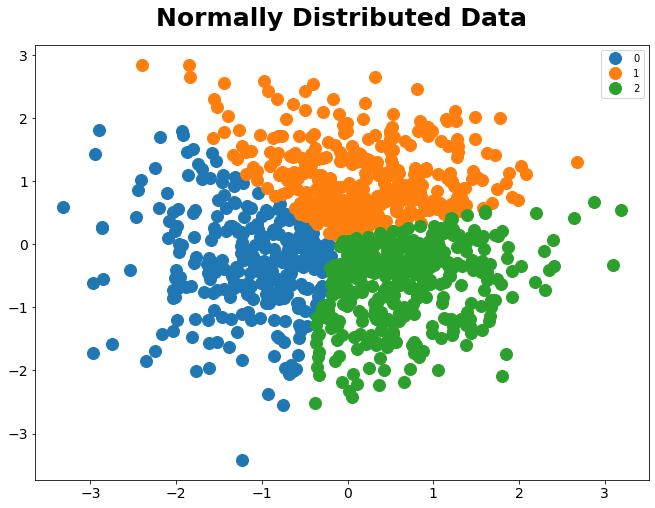

In [57]:
#Let's add labels. It's not the best clustering example but just to check:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
ax.set_title("Normally Distributed Data",fontsize=25,fontweight = 'bold', y=1.03);

Not bad! You can see that it's working even though this "data set" really doesn't have any clustering in it.